Welcome to my analysis of the Seattle Airbnb dataset using the CRISP-DM process! In this notebook,I will be exploring the Seattle Airbnb market and answering key questions related to the pricing, availability, and other features of Airbnb listings in this city.  

To ensure a structured approach, I will be following the CRISP-DM process, which consists of six stages: Business Understanding, Data Understanding, Data Preparation, Modelling, Evaluation, and Deployment. For this project, I will be using the necessary stages to answer three business questions outlined below.

### 1. Business Understanding
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
##### The following Airbnb activity is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day
##### In This Project, we need to answer 3 questions:
1. Are there any seasonal trends both listings and price over the course of a year?
2. How does the number of Airbnb listings and their average prices compare between different Seattle neighborhoods?
3. What are the most common amenities offered by Seattle Airbnb hosts and how they affect the price?

### 2. Data Understanding

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [66]:
# Load the datasets
df_calendar = pd.read_csv('../SeatleAirbnb/Data/calendar.csv')
df_listing = pd.read_csv('../SeatleAirbnb/Data/listings.csv')
df_reviews = pd.read_csv('../SeatleAirbnb/Data/reviews.csv')

In [67]:
# Get the  number of records and features
for data in [df_calendar,df_listing,df_reviews]:
    display(data.head())
    print(data.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

(3818, 92)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 6)


In [68]:
# Check the 10 missing values for columns in each dataframe
for data in [df_calendar,df_listing,df_reviews]:
    missing_values_count = data.isnull().sum().sort_values(ascending=False)[:10]
    total  = data.shape[0]
    print(f"Missing values:\n{missing_values_count/total*100}\n")

Missing values:
price         32.938998
listing_id     0.000000
date           0.000000
available      0.000000
dtype: float64

Missing values:
license                  100.000000
square_feet               97.459403
monthly_price             60.267156
security_deposit          51.126244
weekly_price              47.380828
notes                     42.063908
neighborhood_overview     27.029859
cleaning_fee              26.977475
transit                   24.463070
host_about                22.498690
dtype: float64

Missing values:
comments         0.021214
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
dtype: float64



In Order to answer these questions , I will use:
- Calendar.csv
- listings.csv

### 3. Data Preparation

In [69]:
# Convert the 'date' column to a datetime object
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Extract the year, month, day from the 'date' column
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['day'] = df_calendar['date'].dt.weekday
df_calendar['day_name'] = df_calendar['date'].dt.day_name()
df_calendar['month_name'] = df_calendar['date'].dt.month_name()

# Reformat the money related columns
df_calendar['price'].replace('\$|,', '', regex=True, inplace=True)
df_calendar['price'].fillna(0, inplace=True)
df_calendar['price']= df_calendar['price'].astype('float')
df_listing['price'].replace('\$|,', '', regex=True, inplace=True)
df_listing['price'].fillna(0, inplace=True)
df_listing['price']= df_listing['price'].astype('float')

In [70]:
df_calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [71]:
# Replace values of available column 
df_calendar['available'].replace({'t':1, 'f':0}, regex=True, inplace=True)

In [72]:
df_calendar['year'].unique()

array([2016, 2017], dtype=int64)

### 4. Data Modeling

##### Question 01: Are there any seasonal trends both listings and price over the course of a year?


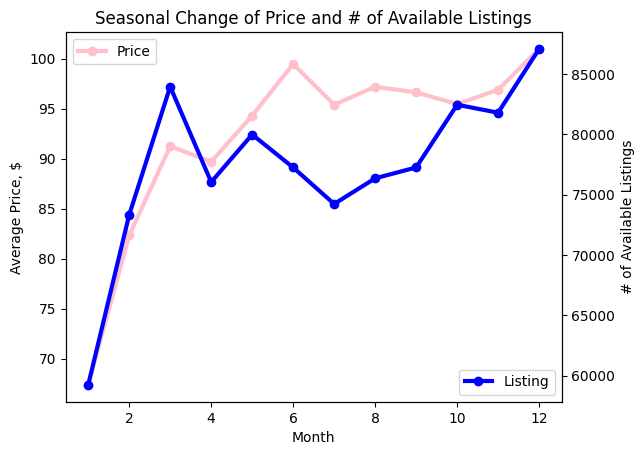

In [73]:
fig,ax = plt.subplots()
ax.plot(df_calendar[df_calendar.year==2016].groupby(['month']).price.mean(),color='pink', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(df_calendar[df_calendar.year==2016].groupby(['month']).available.sum(), color='blue', marker ='o', linewidth=3, label='Listing')
ax2.set_ylabel('# of Available Listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Seasonal Change of Price and # of Available Listings')
plt.show()

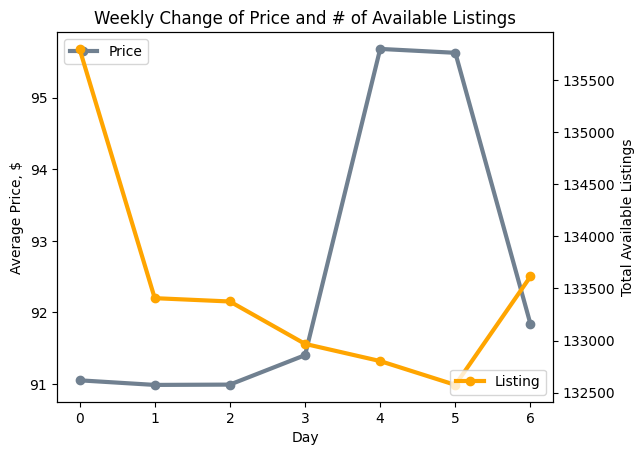

In [74]:
fig,ax = plt.subplots()
ax.plot(df_calendar.groupby(['day']).price.mean(),color='slategrey', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Day')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(df_calendar.groupby(['day']).available.sum(), color='orange', marker ='o', linewidth=3, label="Listing")
ax2.set_ylabel('Total Available Listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Weekly Change of Price and # of Available Listings')
plt.show()

##### Finding and answers for the Question 1:
- The highest prices during the year in the monthly chart are found in the summer season (June-August), while in the weekly chart these behaviors are repeated on Friday and Saturday.
- On the other hand, the number of available listings increases as we approach the holidays, November and December, presenting a considerable drop at the beginning of the year (January), which may be due to the closure of the rental business in January. In a weekly view, the number of available homes skyrockets on weekends, Saturdays and Sundays.

##### Question 02: How does the number of Airbnb listings and their average prices compare between different Seattle neighborhoods?

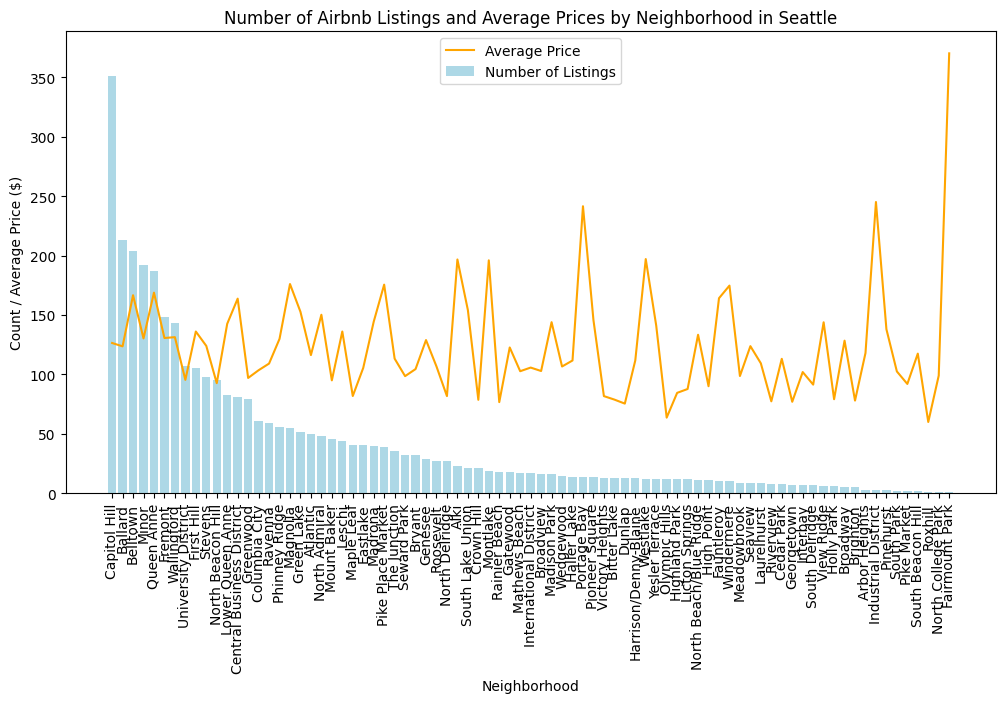

In [75]:
# Group the data by neighborhood and calculate the count and average of listings in each neighborhood
neighborhood_stats = df_listing.groupby('neighbourhood')['id'].count().reset_index()
neighborhood_stats['avg_price'] = df_listing.groupby('neighbourhood')['price'].mean().reset_index()['price']

# Sort the neighborhoods by the number of listings in descending order
neighborhood_stats.sort_values('id', ascending=False, inplace=True)

# Plot the number of listings and average prices for each neighborhood
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_stats['neighbourhood'], neighborhood_stats['id'], color='lightblue', label='Number of Listings')
plt.plot(neighborhood_stats['neighbourhood'], neighborhood_stats['avg_price'], color='orange', label='Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Count / Average Price ($)')
plt.title('Number of Airbnb Listings and Average Prices by Neighborhood in Seattle')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Finding and answers for the Question 2:
- The number of Airbnb listings varies significantly between different neighborhoods. Some neighborhoods have a much higher number of listings than others.
- The average prices of Airbnb listings also vary between different neighborhoods. Some neighborhoods have much higher average prices than others.
- There is a moderate correlation between the number of Airbnb listings and the average prices. Neighborhoods with a higher number of listings tend to have lower average prices, while neighborhoods with a lower number of listings tend to have higher average prices.
- The neighborhoods with the highest number of Airbnb listings are Capitol Hill, Downtown, and Central Area. However, these neighborhoods have relatively lower average prices compared to some other neighborhoods.
- The neighborhoods with the highest average prices are Magnolia, Queen Anne, and Downtown. However, these neighborhoods have relatively lower numbers of Airbnb listings.

##### Question 03: What are the most common amenities offered by Seattle Airbnb hosts and how they affect the price?

In [77]:
# Extract the amenities column and split the strings to create a list of amenities for each listing
df_listing['amenities'] = df_listing['amenities'].str.replace('[{}]', '', regex=True).str.split(',')

In [109]:
# Count the occurrences of each amenity and create a new DataFrame to store the results
amenities_counts = df_listing['amenities'].explode().value_counts().reset_index()
amenities_counts.columns = ['amenity', 'quantity']

In [106]:
amenities_counts.sort_values('count', ascending=False, inplace=True)

Text(0, 0.5, 'Amenities')

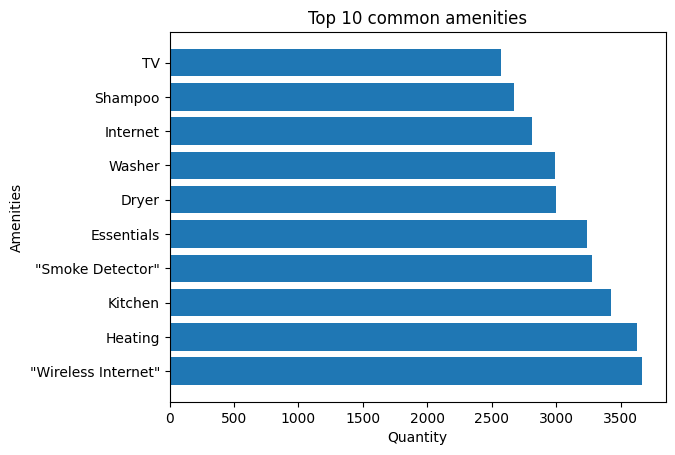

In [153]:
fig, ax = plt.subplots()
ax.barh(amenities_counts['amenity'][:10], amenities_counts['quantity'][:10])
ax.set_title('Top 10 common amenities')
ax.set_xlabel('Quantity')
ax.set_ylabel('Amenities')

In [81]:
# Create a boolean column for each amenity indicating whether it is present or not
for amenity in amenities_counts['amenity']:
    df_listing[amenity] = df_listing['amenities'].apply(lambda x: amenity in x)

In [82]:
# Calculate the average price for listings with and without each amenity
amenity_price_stats = df_listing.groupby(amenities_counts['amenity'])['price'].mean().reset_index()
amenity_price_stats.columns = ['amenity', 'avg_price']

In [104]:
# Sort the amenities by average price in descending order
amenity_price_stats.sort_values('avg_price', ascending=False, inplace=True)

Text(0, 0.5, 'Amenities')

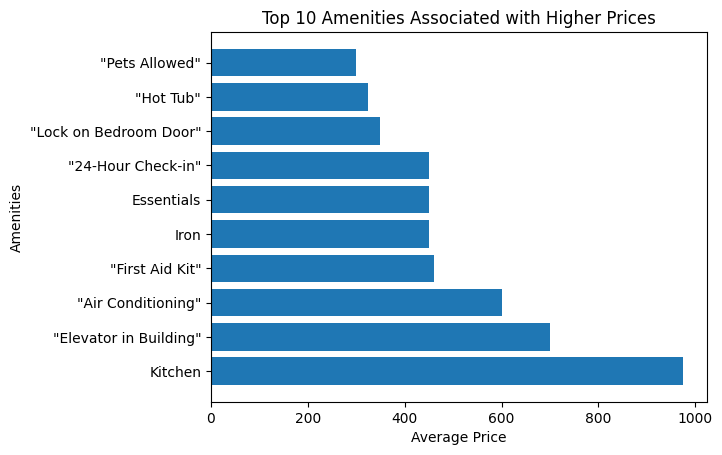

In [113]:
fig, ax = plt.subplots()
ax.barh(amenity_price_stats['amenity'][:10], amenity_price_stats['avg_price'][:10])
ax.set_title('Top 10 Amenities Associated with Higher Prices')
ax.set_xlabel('Average Price')
ax.set_ylabel('Amenities')

##### Finding and answers for the Question 3:
- The top 5 common amenities are:
    -   Wireless Internet
    -   Heating
    -   Kitchen 
    -   Smoke Detector
- These amenities are included in more than 90% of the listings. It is interesting to note that amenities such as TV and Air Conditioning, which are often considered as basic amenities, are not in the top 5 list.
- Also there are certain amenities that are associated with higher prices, such as Hot Tub, Pool, and Fireplace. On the other hand, amenities such as Heating, Wireless Internet, and Kitchen are offered by most hosts and do not have a significant impact on the listing price.
- Overall, hosts tend to provide basic amenities that are essential for a comfortable stay, such as Internet, Heating, and Kitchen. However, hosts who provide additional amenities such as Hot Tub and Pool may charge a premium price for their listings.